In [750]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
import os
import site
from pathlib import Path
path = Path(os.getcwd())
site.addsitedir(path.parent)  # Always appends to end
from utils.date2datetime import *
from datetime import datetime
from fuzzywuzzy import process
import seaborn as sns
import matplotlib.pyplot as plt

In [751]:
dict_converter = {
    'summary': 'object',
    'icon': 'object'
}
parser_dates = lambda x: datetime.strptime(x, "%m/%d/%Y %H:%M")

In [752]:
dir_folder = 'C:\\Users\\Lucas\\Documents\\GitHub\\Resources\\'
df_w = pd.read_csv(dir_folder + '2. Weather data\\training_set_weather_data.csv', \
                  dtype = dict_converter,
                  parse_dates=['Flight Datetime', 'AOBT', 'ATOT', 'time_hourly'],
                  date_parser=parser_dates)
display(df_w.head())
display(pd.read_csv('C:\\Data\\Hackathon\\Weather_data.csv').head())

,Flight Number,Flight Datetime,Aircraft Model,Aircraft Length,Aircraft Span,No. Engines,Airport Arrival/Departure,Movement Type,AOBT,ATOT,Distance_proxy_m,Log_distance_m,actual_taxi_out_sec,Year,Month,Weekday,Hour,N_dep_dep,N_dep_arr,Q_dep_dep,Q_dep_arr,time_hourly,summary,icon,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,precipType,precipAccumulation,ozone
0,DY2434,2015-01-01 06:00:00,B737-800 WINGLETS,39.50,35.70,2,TFS,D,2015-01-01 05:56:00,2015-01-01 06:05:00,3276.655443,8.094578,540,2015,1,3,6,3,2,0,1,2015-01-01 06:00:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,44.65,39.29,42.8,0.93,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4
1,EZY8869,2015-01-01 06:10:00,A320-100/200,56.70,60.00,2,AMS,D,2015-01-01 06:08:00,2015-01-01 06:18:00,2777.685343,7.929373,600,2015,1,3,6,6,1,1,1,2015-01-01 06:00:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,44.65,39.29,42.8,0.93,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4
2,EZY8462,2015-01-01 06:15:00,A320-100/200,37.56,34.09,2,GVA,D,2015-01-01 06:08:00,2015-01-01 06:19:00,2729.133359,7.911739,660,2015,1,3,6,6,1,2,2,2015-01-01 06:00:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,44.65,39.29,42.8,0.93,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4
3,BA2632,2015-01-01 06:20:00,A320-100/200,37.56,34.09,2,ALC,D,2015-01-01 06:24:00,2015-01-01 06:36:00,2292.070065,7.737211,720,2015,1,3,6,9,2,5,1,2015-01-01 06:00:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,44.65,39.29,42.8,0.93,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4
4,EZY5381,2015-01-01 06:20:00,A319,33.84,34.09,2,MUC,D,2015-01-01 06:14:00,2015-01-01 06:27:00,3194.416489,8.069160,780,2015,1,3,6,6,1,2,2,2015-01-01 06:00:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,44.65,39.29,42.8,0.93,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,time_hourly,summary,icon,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,precipType,precipAccumulation,ozone
0,1/1/2015 6:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,44.65,39.29,42.8,0.93,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4
1,1/1/2015 6:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,44.65,39.29,42.8,0.93,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4
2,1/1/2015 6:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,44.65,39.29,42.8,0.93,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4
3,1/1/2015 6:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,44.65,39.29,42.8,0.93,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4
4,1/1/2015 6:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,44.65,39.29,42.8,0.93,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4


In [753]:


acchar_path = 'C:\\Data\\Hackathon\\1. AC characteristics\\ACchar.xlsx'
df_a = pd.read_excel(acchar_path, sheet_name='test', na_values = 'tbd', \
                     dtype = dict_converter_aircraft)
df['a'] = pd.to_numeric(df['a'], errors='coerce')
display(df_a.head())


ValueError: Unable to convert column Wingspan, ft to type <class 'numpy.float64'>

In [ ]:
df_a['A320-100']

In [ ]:
df_geo = pd.read_csv('C:\\Data\\Hackathon\\geographic_data.csv')
display(df_geo.head())
#display(pd.read_csv('C:\\Data\\Hackathon\\geographic_data.csv').head())

In [366]:
day =["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_apt_time = pd.read_csv('C:\\Data\\Hackathon\\0. Airport data\\training_set_airport_data.csv',\
                         parse_dates=['Flight Datetime', 'AOBT', 'ATOT'],
                         date_parser=parser_dates)
display(df_apt_time.head())
display(pd.read_csv('C:\\Data\\Hackathon\\training_set_airport_data.csv').head())

df_apt_time['Hour'] = df_apt_time['AOBT'].apply(lambda x: x.hour)
df_apt_time['Day'] = df_apt_time['AOBT'].apply(lambda x: day[x.weekday()])

,Flight Datetime,Aircraft Model,AOBT,ATOT,Stand,Runway
0,2015-01-01 06:00:00,B737-800 WINGLETS,2015-01-01 05:56:00,2015-01-01 06:05:00,STAND_62,RUNWAY_4
1,2015-01-01 06:10:00,A320-100/200,2015-01-01 06:08:00,2015-01-01 06:18:00,STAND_153,RUNWAY_4
2,2015-01-01 06:15:00,A320-100/200,2015-01-01 06:08:00,2015-01-01 06:19:00,STAND_44,RUNWAY_2
3,2015-01-01 06:20:00,A320-100/200,2015-01-01 06:24:00,2015-01-01 06:36:00,STAND_7,RUNWAY_3
4,2015-01-01 06:20:00,A319,2015-01-01 06:14:00,2015-01-01 06:27:00,STAND_17,RUNWAY_2


,Flight Datetime,Aircraft Model,AOBT,ATOT,Stand,Runway
0,1/1/2015 6:00,B737-800 WINGLETS,1/1/2015 5:56,1/1/2015 6:05,STAND_62,RUNWAY_4
1,1/1/2015 6:10,A320-100/200,1/1/2015 6:08,1/1/2015 6:18,STAND_153,RUNWAY_4
2,1/1/2015 6:15,A320-100/200,1/1/2015 6:08,1/1/2015 6:19,STAND_44,RUNWAY_2
3,1/1/2015 6:20,A320-100/200,1/1/2015 6:24,1/1/2015 6:36,STAND_7,RUNWAY_3
4,1/1/2015 6:20,A319,1/1/2015 6:14,1/1/2015 6:27,STAND_17,RUNWAY_2


In [124]:
df_apt_time.set_index('AOBT', inplace=True)


,Flight Datetime,Aircraft Model,ATOT,Stand,Runway
AOBT,,,,,
2015-01-01 05:56:00,2015-01-01 06:00:00,B737-800 WINGLETS,2015-01-01 06:05:00,STAND_62,RUNWAY_4
2015-01-01 06:08:00,2015-01-01 06:10:00,A320-100/200,2015-01-01 06:18:00,STAND_153,RUNWAY_4
2015-01-01 06:30:00,2015-01-01 06:30:00,A319,2015-01-01 06:42:00,STAND_55,RUNWAY_4
2015-01-01 06:46:00,2015-01-01 06:50:00,A319,2015-01-01 06:54:00,STAND_67,RUNWAY_4
2015-01-01 06:54:00,2015-01-01 07:00:00,A321-100/200,2015-01-01 07:06:00,STAND_84,RUNWAY_4
...,...,...,...,...,...
2018-12-31 19:29:00,2018-12-31 19:30:00,A319,2018-12-31 19:39:00,STAND_137,RUNWAY_4
2018-12-31 19:42:00,2018-12-31 19:40:00,A319,2018-12-31 19:52:00,STAND_23,RUNWAY_4
2018-12-31 19:45:00,2018-12-31 19:50:00,A320-100/200,2018-12-31 19:56:00,STAND_55,RUNWAY_4


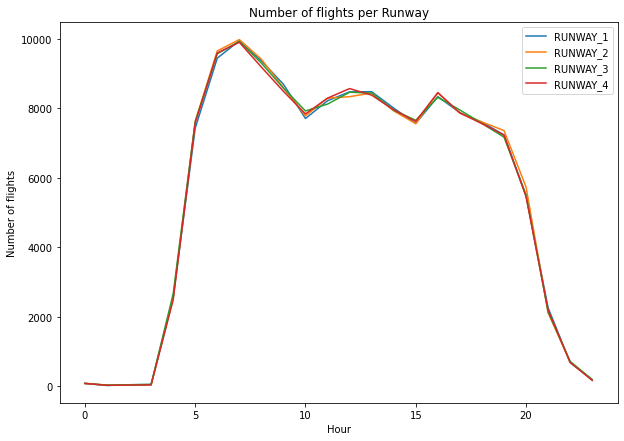

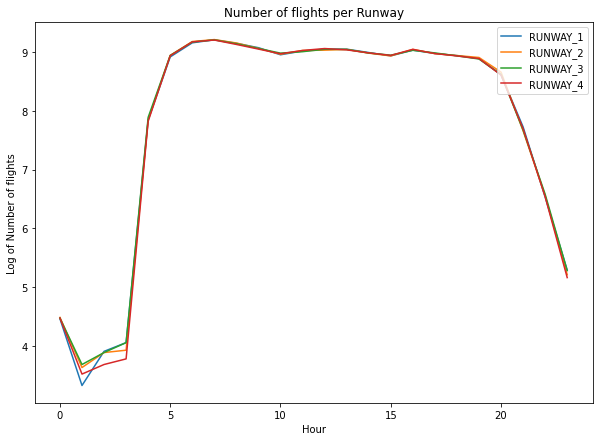

In [452]:
import seaborn as sns
op_plot_df = df_apt_time[['Hour', 'ATOT', 'Runway']].groupby(['Hour', 'Runway']).count().reset_index()
plt.figure(figsize=(10,7))
sns.lineplot(data=op_plot_df, x="Hour", y="ATOT", hue="Runway")
plt.title('Number of flights per Runway')
plt.ylabel('Number of flights')
plt.legend(loc='upper right')
plt.savefig('../../Resources/operation_plot.png')
plt.show()
plt.figure(figsize=(10,7))
op_plot_df['ATOT'] = np.log(op_plot_df['ATOT'])
sns.lineplot(data=op_plot_df, x="Hour", y="ATOT", hue="Runway")
plt.title('Number of flights per Runway')
plt.ylabel('Log of Number of flights')
plt.legend(loc='upper right')
plt.savefig('../../Resources/operation_plot_log.png')
plt.show()

<AxesSubplot:xlabel='Hour', ylabel='ATOT'>

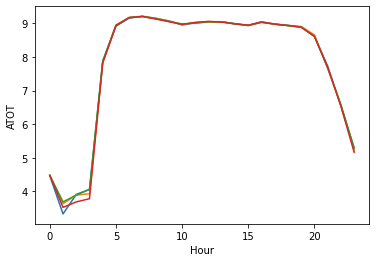

In [470]:
sns.lineplot(data=op_plot_df, x="Hour", y="ATOT", hue="Runway", legend=False)


In [200]:
df_apt_time['ATOT'].dt.date == np.datetime64('2015-01-01')

0          True
1          True
2          True
3          True
4          True
          ...  
543808    False
543809    False
543810    False
543811    False
543812    False
Name: ATOT, Length: 543813, dtype: bool

,Flight Datetime,Aircraft Model,AOBT,ATOT,Stand,Hour,Day
Runway,,,,,,,
RUNWAY_1,0.249639,0.249639,0.249639,0.249639,0.249639,0.249639,0.249639
RUNWAY_2,0.250776,0.250776,0.250776,0.250776,0.250776,0.250776,0.250776
RUNWAY_3,0.250047,0.250047,0.250047,0.250047,0.250047,0.250047,0.250047
RUNWAY_4,0.249538,0.249538,0.249538,0.249538,0.249538,0.249538,0.249538


In [40]:
df_apt_time['Taxiing'] = (df_apt_time['ATOT'] - df_apt_time['AOBT']).dt.seconds/60

In [41]:
df_apt_time[['Runway', 'Stand', 'Taxiing']].groupby('Runway').mean()

,Taxiing
Runway,
RUNWAY_1,18.757280
RUNWAY_2,18.732319
RUNWAY_3,18.786416
RUNWAY_4,18.764396


In [43]:
df_apt_time[['Runway', 'Stand', 'Taxiing']].groupby(['Stand', 'Runway']).median().sort_values(by='Taxiing')

Taxiing
Stand     Runway           
STAND_1   RUNWAY_1     17.0
STAND_27  RUNWAY_3     17.0
          RUNWAY_2     17.0
          RUNWAY_1     17.0
STAND_26  RUNWAY_2     17.0
...                     ...
STAND_121 RUNWAY_4     18.0
STAND_122 RUNWAY_2     18.0
STAND_19  RUNWAY_3     18.0
STAND_22  RUNWAY_3     18.0
STAND_23  RUNWAY_4     18.0

[664 rows x 1 columns]

In [124]:
import seaborn as sns
flights = df_

TypeError: 'function' object is not subscriptable

In [125]:
df_apt_time

,Flight Datetime,Aircraft Model,AOBT,ATOT,Stand,Runway,Hour,Day,Taxiing
0,2015-01-01 06:00:00,B737-800 WINGLETS,2015-01-01 05:56:00,2015-01-01 06:05:00,STAND_62,RUNWAY_4,5,Thursday,9.0
1,2015-01-01 06:10:00,A320-100/200,2015-01-01 06:08:00,2015-01-01 06:18:00,STAND_153,RUNWAY_4,6,Thursday,10.0
2,2015-01-01 06:15:00,A320-100/200,2015-01-01 06:08:00,2015-01-01 06:19:00,STAND_44,RUNWAY_2,6,Thursday,11.0
3,2015-01-01 06:20:00,A320-100/200,2015-01-01 06:24:00,2015-01-01 06:36:00,STAND_7,RUNWAY_3,6,Thursday,12.0
4,2015-01-01 06:20:00,A319,2015-01-01 06:14:00,2015-01-01 06:27:00,STAND_17,RUNWAY_2,6,Thursday,13.0
...,...,...,...,...,...,...,...,...,...
543808,2018-12-31 21:15:00,A350-900,2018-12-31 21:02:00,2018-12-31 21:20:00,STAND_150,RUNWAY_3,21,Monday,18.0
543809,2018-12-31 21:30:00,B787-900,2018-12-31 21:24:00,2018-12-31 21:38:00,STAND_77,RUNWAY_1,21,Monday,14.0
543810,2018-12-31 21:50:00,A330-200,2018-12-31 22:27:00,2018-12-31 22:37:00,STAND_120,RUNWAY_1,22,Monday,10.0
543811,2018-12-31 22:10:00,B787-800 Dreamliner,2018-12-31 22:09:00,2018-12-31 22:29:00,STAND_49,RUNWAY_2,22,Monday,20.0


In [15]:
import re
for name in df_w['Aircraft Model'].unique():
    size_airplane = df_w.loc[df_w['Aircraft Model'] == name, 'Aircraft Length'][0]
    filtered_df_a = df_a[np.logical_and(df_a['Length, ft'] <  size_airplane*1.05, df_a['Length, ft'] >  size_airplane*0.95)]
    x = re.search("\d{3,}", name)
    prob_aircraft=process.extract(x.group(), filtered_df_a['A320-100'], limit = len(filtered_df_a['A320-100']))[0][0]
    #closest match, similarity score, index of match)
    print(x.group(),prob_aircraft)
    print(f"Name in weather: {name} |  name in aircraft : {prob_aircraft} ")
    #df_transactions.loc[df_transactions['Boutique Name'].isin([name]), 'City'] = prob_city
    break

TypeError: '>' not supported between instances of 'numpy.ndarray' and 'str'

In [17]:
df_a.head()

,Date Completed,Manufacturer,A320-100,Physical Class (Engine),# Engines,AAC,ADG,TDG,Approach Speed\n(Vref),Wingtip Configuration,"Wingspan, ft","Length, ft","Tail Height, ft\n(@ OEW)","Wheelbase, ft",Cockpit to Main Gear (CMG),MGW\n(Outer to Outer),MTOW,Max Ramp\nMax Taxi,Main Gear Config,ICAO Code,Wake Category,ATCT Weight Class,Years Manufactured,Note,"Parking Area (WS x Length), sf"
0,2018-07-03 00:00:00,Acro Sport,Acro Sport,Piston,1,A,I,1A,55.9,no winglets,19.5833,17.5,6,tbd,tbd,tbd,1350,1520,S,ACRO,L,Small Eqpt,tbd,tbd,342.708
1,2018-06-01 00:00:00,Acro Sport,Acro Sport II,Piston,1,A,I,1A,59.8,no winglets,21.6667,18.8542,6.64583,tbd,tbd,tbd,1520,1520,S,ACR2,L,Small Eqpt,tbd,tbd,408.507
2,2018-07-03 00:00:00,Acro Sport,Cougar,Piston,1,A,I,1A,45.5,no winglets,20.5,18.9167,5.5,tbd,tbd,tbd,1250,1250,S,COUG,L,Small Eqpt,tbd,tbd,387.792
3,2018-07-03 00:00:00,Acro Sport,Junior Ace,Piston,1,A,I,1A,49.4,no winglets,26.5,18,tbd,tbd,tbd,tbd,1225,1225,S,JACE,L,Small Eqpt,tbd,tbd,477
4,2018-07-03 00:00:00,Acro Sport,Super Ace,Piston,1,A,I,1A,49.4,no winglets,27.2917,18.5,6.5,tbd,tbd,tbd,1030,1030,S,SACE,L,Small Eqpt,tbd,tbd,504.896


In [257]:
df_

,Date Completed,Manufacturer,A320-100,Physical Class (Engine),# Engines,AAC,ADG,TDG,Approach Speed\n(Vref),Wingtip Configuration,"Wingspan, ft","Length, ft","Tail Height, ft\n(@ OEW)","Wheelbase, ft",Cockpit to Main Gear (CMG),MGW\n(Outer to Outer),MTOW,Max Ramp\nMax Taxi,Main Gear Config,ICAO Code,Wake Category,ATCT Weight Class,Years Manufactured,Note,"Parking Area (WS x Length), sf"
0,2018-07-03 00:00:00,Acro Sport,Acro Sport,Piston,1.0,A,I,1A,55.9,no winglets,19.5833,17.5,6.000000,NaN,NaN,NaN,1350.0,1520,S,ACRO,L,Small Eqpt,NaN,NaN,342.708333
1,2018-06-01 00:00:00,Acro Sport,Acro Sport II,Piston,1.0,A,I,1A,59.8,no winglets,21.6667,18.8542,6.645833,NaN,NaN,NaN,1520.0,1520,S,ACR2,L,Small Eqpt,NaN,NaN,408.506944
2,2018-07-03 00:00:00,Acro Sport,Cougar,Piston,1.0,A,I,1A,45.5,no winglets,20.5,18.9167,5.500000,NaN,NaN,NaN,1250.0,1250,S,COUG,L,Small Eqpt,NaN,NaN,387.791667
3,2018-07-03 00:00:00,Acro Sport,Junior Ace,Piston,1.0,A,I,1A,49.4,no winglets,26.5,18,NaN,NaN,NaN,NaN,1225.0,1225,S,JACE,L,Small Eqpt,NaN,NaN,477.000000
4,2018-07-03 00:00:00,Acro Sport,Super Ace,Piston,1.0,A,I,1A,49.4,no winglets,27.2917,18.5,6.500000,NaN,NaN,NaN,1030.0,1030,S,SACE,L,Small Eqpt,NaN,NaN,504.895833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2759,NaN,Zlin,Zlin Z-50,NaN,NaN,No Value,No Value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BA11,M,NaN,NaN,NaN,NaN
2760,NaN,Zlin,Zlin Z-526 Akrobat,NaN,NaN,No Value,No Value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2761,NaN,Zlin,Zlin Z-526 Trener Master,NaN,NaN,No Value,No Value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2762,NaN,Zlin,Zlin Z-626,NaN,NaN,No Value,No Value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [706]:
df_apt_time

,Flight Datetime,Aircraft Model,AOBT,ATOT,Stand,Runway,Hour,Day,N,Q,N_rw,Q_rw
0,2015-01-01 06:00:00,B737-800 WINGLETS,2015-01-01 05:56:00,2015-01-01 06:05:00,STAND_62,RUNWAY_4,5,Thursday,0,0,133.0,0.0
1,2015-01-01 06:10:00,A320-100/200,2015-01-01 06:08:00,2015-01-01 06:18:00,STAND_153,RUNWAY_4,6,Thursday,0,0,133.0,0.0
2,2015-01-01 06:15:00,A320-100/200,2015-01-01 06:08:00,2015-01-01 06:19:00,STAND_44,RUNWAY_2,6,Thursday,0,0,133.0,0.0
3,2015-01-01 06:20:00,A320-100/200,2015-01-01 06:24:00,2015-01-01 06:36:00,STAND_7,RUNWAY_3,6,Thursday,3,3,133.0,0.0
4,2015-01-01 06:20:00,A319,2015-01-01 06:14:00,2015-01-01 06:27:00,STAND_17,RUNWAY_2,6,Thursday,2,2,133.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
543808,2018-12-31 21:15:00,A350-900,2018-12-31 21:02:00,2018-12-31 21:20:00,STAND_150,RUNWAY_3,21,Monday,1,1,NaN,NaN
543809,2018-12-31 21:30:00,B787-900,2018-12-31 21:24:00,2018-12-31 21:38:00,STAND_77,RUNWAY_1,21,Monday,0,0,NaN,NaN
543810,2018-12-31 21:50:00,A330-200,2018-12-31 22:27:00,2018-12-31 22:37:00,STAND_120,RUNWAY_1,22,Monday,1,1,NaN,NaN
543811,2018-12-31 22:10:00,B787-800 Dreamliner,2018-12-31 22:09:00,2018-12-31 22:29:00,STAND_49,RUNWAY_2,22,Monday,0,0,NaN,NaN


In [542]:
aobt_j = df_apt_time['AOBT']
atot_j = df_apt_time['ATOT']
runw_j = df_apt_time['Runway'] 
N = []
Q = []
iterat = np.vstack((aobt_j, atot_j)).T
from tqdm import tqdm
for aobt_i, atot_i in tqdm(iterat):
    moving_aircrafts_rw = (runw_j == runw_j[i])
    moving_aircrafts = np.logical_and(aobt_j < aobt_i, atot_j > aobt_i)
    N_i = np.sum(moving_aircrafts)
    Q_i = np.sum(np.logical_and(moving_aircrafts, atot_j < atot_i))
    N.append(N_i)
    Q.append(Q_i)

    

  0%|                                                                           | 713/543813 [00:20<4:14:06, 35.62it/s]


KeyboardInterrupt: 

In [546]:

df_apt_time[['Flight Datetime', 'ATOT', 'N', 'Q' ]].to_pickle('./df_apt_time.pkl')

In [171]:
train_weather = df_apt_time.set_index('Flight Datetime').join(df_w.set_index('Flight Datetime'), on='Flight Datetime', lsuffix='a')

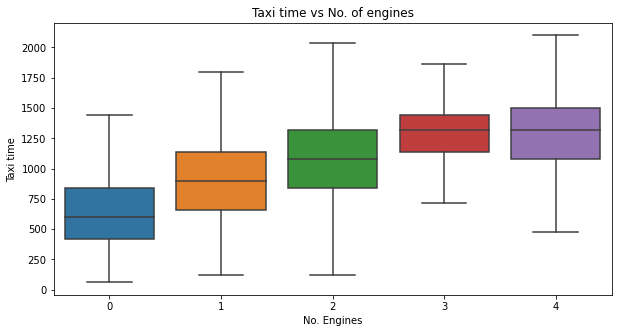

In [456]:
plt.figure(figsize=(10,5))
sns.boxplot(x="No. Engines", y="actual_taxi_out_sec", data=df_w, showfliers = False)
plt.title('Taxi time vs No. of engines')
plt.ylabel('Taxi time')
plt.show()

<AxesSubplot:xlabel='icon', ylabel='actual_taxi_out_sec'>

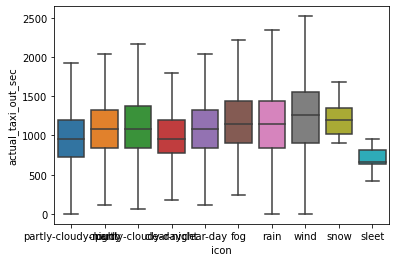

In [206]:
sns.boxplot(x="icon", y="actual_taxi_out_sec", data=df_w, showfliers = False)

<AxesSubplot:xlabel='temp_int', ylabel='actual_taxi_out_sec'>

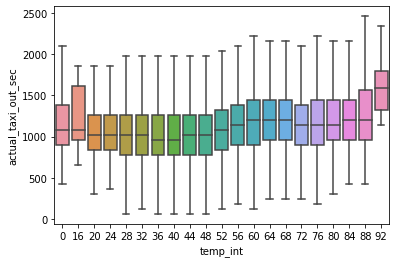

In [215]:
sns.boxplot(x="temp_int", y="actual_taxi_out_sec", data=df_w, showfliers = False)

In [218]:
df_w['temp_int'] = df_w['temperature'].fillna(0).astype(int) - df_w['temperature'].fillna(0).astype(int)%4
df_w['N_Q_dep'] = df_w['N_dep_dep'] - df_w['Q_dep_dep']

<AxesSubplot:xlabel='N_dep_dep', ylabel='actual_taxi_out_sec'>

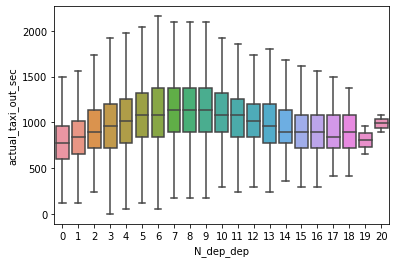

In [216]:
sns.boxplot(x="N_dep_dep", y="actual_taxi_out_sec", data=df_w, showfliers = False)

<AxesSubplot:xlabel='Q_dep_dep', ylabel='actual_taxi_out_sec'>

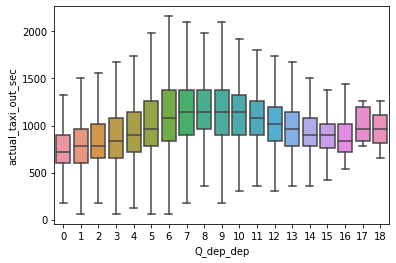

In [217]:
sns.boxplot(x="Q_dep_dep", y="actual_taxi_out_sec", data=df_w, showfliers = False)

<AxesSubplot:xlabel='N_Q_dep', ylabel='actual_taxi_out_sec'>

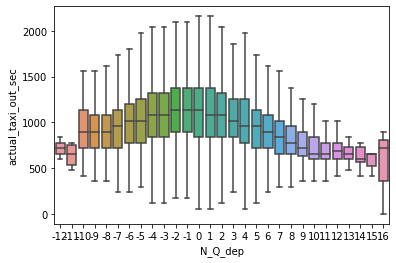

In [220]:
sns.boxplot(x="N_Q_dep", y="actual_taxi_out_sec", data=df_w, showfliers = False)

In [221]:
from sklearn.tree import DecisionTreeRegressor

In [241]:
X = df_w.iloc[:,[3,4,5,10,11,15, 16, 17,19, 24,25,26,27,28,29,30,31,32,33,34,35,36,38,39]]
y = df_w['actual_taxi_out_sec']
X = X.fillna(method='ffill')

In [242]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

(0.0, 1000.0)

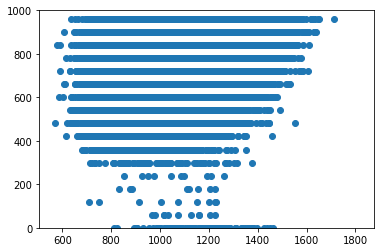

In [253]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
plt.scatter(reg.predict(X_test), y_test)
plt.ylim(0,1000)

In [247]:
 reg.coef_

array([ 7.14166092e-01,  6.73128150e-01,  7.93552422e+01, -1.29391128e-01,
        1.08188913e+02,  6.36966612e+00, -9.85238938e+00, -5.93543483e+00,
        2.18079269e+01,  8.98390764e+02, -6.60770123e-01,  5.00834910e+00,
        1.87848670e+00, -1.57570291e+00,  4.05167635e+02,  6.95436360e-01,
        9.05365742e-01,  4.83347889e+00, -2.26692509e-01,  1.33886461e+01,
        3.82771067e+01,  2.78699141e-01,  4.24646737e+03,  4.36598739e-01])

In [367]:
df_apt_time

,Flight Datetime,Aircraft Model,AOBT,ATOT,Stand,Runway,Hour,Day
0,2015-01-01 06:00:00,B737-800 WINGLETS,2015-01-01 05:56:00,2015-01-01 06:05:00,STAND_62,RUNWAY_4,5,Thursday
1,2015-01-01 06:10:00,A320-100/200,2015-01-01 06:08:00,2015-01-01 06:18:00,STAND_153,RUNWAY_4,6,Thursday
2,2015-01-01 06:15:00,A320-100/200,2015-01-01 06:08:00,2015-01-01 06:19:00,STAND_44,RUNWAY_2,6,Thursday
3,2015-01-01 06:20:00,A320-100/200,2015-01-01 06:24:00,2015-01-01 06:36:00,STAND_7,RUNWAY_3,6,Thursday
4,2015-01-01 06:20:00,A319,2015-01-01 06:14:00,2015-01-01 06:27:00,STAND_17,RUNWAY_2,6,Thursday
...,...,...,...,...,...,...,...,...
543808,2018-12-31 21:15:00,A350-900,2018-12-31 21:02:00,2018-12-31 21:20:00,STAND_150,RUNWAY_3,21,Monday
543809,2018-12-31 21:30:00,B787-900,2018-12-31 21:24:00,2018-12-31 21:38:00,STAND_77,RUNWAY_1,21,Monday
543810,2018-12-31 21:50:00,A330-200,2018-12-31 22:27:00,2018-12-31 22:37:00,STAND_120,RUNWAY_1,22,Monday
543811,2018-12-31 22:10:00,B787-800 Dreamliner,2018-12-31 22:09:00,2018-12-31 22:29:00,STAND_49,RUNWAY_2,22,Monday


In [306]:
df_geo['runway'] = df_geo['runway'].str.lower()
df_geo['stand'] = df_geo['stand'].str.lower()
df_apt_time['Stand'] = df_apt_time['Stand'].str.lower()
df_apt_time['Runway'] = df_apt_time['Runway'].str.lower()
df_geo = df_geo.drop_duplicates().reset_index()

<ipython-input-306-80a393da69bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geo['runway'] = df_geo['runway'].str.lower()
<ipython-input-306-80a393da69bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geo['stand'] = df_geo['stand'].str.lower()


In [307]:
def degree2m(degree):
    return (40000000/360*degree)
def dist(x1,y1,x2,y2):
    return np.sqrt((x1-x2)**2 + (y1-y2)**2)
df_geo['dist_m']=degree2m(dist(df_geo['Lat_runway'], df_geo['Lng_runway'], df_geo['Lat_stand'], df_geo['Lng_stand']))

In [314]:
df_apt_time_merg = pd.merge(df_apt_time, df_geo, left_on=['Stand', 'Runway'], right_on=['stand', 'runway'])

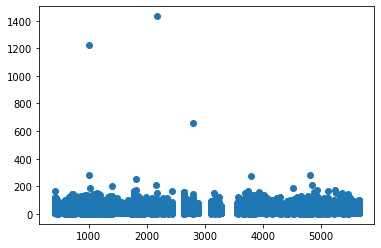

In [318]:
plt.scatter(x='dist_m', y='Taxiing', data = df_apt_time_merg)

In [337]:
df_apt_time_merg['avg_velocity'] = df_apt_time_merg['dist_m']/ (df_apt_time_merg['Taxiing']*60) 

<ipython-input-337-d74cbd41a9e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apt_time_merg['avg_velocity'] = df_apt_time_merg['dist_m']/ (df_apt_time_merg['Taxiing']*60)


In [346]:
df_apt_time_merg[['Runway', 'Stand', 'avg_velocity']].groupby(['Runway', 'Stand']).mean().sort_values(by='avg_velocity')

avg_velocity
Runway   Stand                 
runway_3 stand_27      0.426828
         stand_62      0.431321
         stand_74      0.434977
         stand_23      0.436680
         stand_12      0.455504
...                         ...
runway_1 stand_18      5.583591
         stand_1       5.632176
runway_2 stand_65      5.752740
runway_1 stand_65      5.754356
runway_2 stand_18      5.841185

[386 rows x 1 columns]

In [347]:
df_apt_time_merg[['Runway', 'Stand', 'avg_velocity']].groupby(['Runway']).mean().sort_values(by='avg_velocity')

,avg_velocity
Runway,
runway_4,1.174528
runway_3,1.455652
runway_1,3.986324
runway_2,4.539006


In [336]:
df_apt_time_merg = df_apt_time_merg[~(df_apt_time_merg['AOBT'] == df_apt_time_merg['ATOT'])]

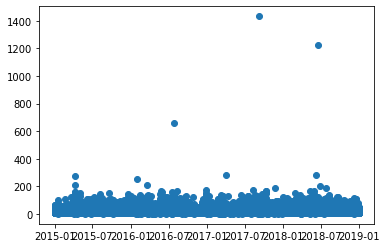

In [363]:
plt.scatter(data = df_apt_time_merg.set_index('Flight Datetime')['2015-01-02':'2015-01-02'], x='AOBT', y = 'Taxiing')

In [370]:
df = pd.read_pickle('./df_apt_time.pkl')

In [375]:
df.set_index('Flight Datetime')['2015-01-02 07:15':'2015-01-02 07:16']

,Aircraft Model,AOBT,ATOT,Stand,Runway,Hour,Day,Taxiing,Taxiing_date,N,Q
Flight Datetime,,,,,,,,,,,
2015-01-02 07:15:00,A319,2015-01-02 07:21:00,2015-01-02 07:40:00,stand_85,runway_1,7,Friday,19.0,0 days 00:19:00,9,9
2015-01-02 07:15:00,A321-100/200,2015-01-02 07:18:00,2015-01-02 07:34:00,stand_160,runway_2,7,Friday,16.0,0 days 00:16:00,8,8
2015-01-02 07:15:00,A320-100/200,2015-01-02 07:12:00,2015-01-02 07:26:00,stand_129,runway_2,7,Friday,14.0,0 days 00:14:00,6,6
2015-01-02 07:15:00,A320-100/200,2015-01-02 07:15:00,2015-01-02 07:33:00,stand_15,runway_3,7,Friday,18.0,0 days 00:18:00,8,8
2015-01-02 07:15:00,A319,2015-01-02 07:14:00,2015-01-02 07:31:00,stand_39,runway_4,7,Friday,17.0,0 days 00:17:00,7,7
2015-01-02 07:15:00,A320-100/200,2015-01-02 07:16:00,2015-01-02 07:29:00,stand_64,runway_2,7,Friday,13.0,0 days 00:13:00,8,6


In [378]:
df_apt_time_merg = pd.merge(df, df_geo, left_on=['Stand', 'Runway'], right_on=['stand', 'runway'])

In [394]:
df_apt_time_merg.set_index('Flight Datetime').loc['2015-07-04 17:25':'2015-07-04 17:59',:]

,Aircraft Model,AOBT,ATOT,Stand,Runway,Hour,Day,Taxiing,Taxiing_date,N,Q,index,runway,Lat_runway,Lng_runway,stand,Lat_stand,Lng_stand,dist_m
Flight Datetime,,,,,,,,,,,,,,,,,,,
2015-07-04 17:30:00,B787-800 Dreamliner,2015-07-04 18:40:00,2015-07-04 18:53:00,stand_128,runway_1,18,Saturday,13.0,0 days 00:13:00,5,5,786,runway_1,54.755307,-0.023040,stand_128,54.765650,-0.009674,1877.879518
2015-07-04 17:40:00,A320-100/200,2015-07-04 19:08:00,2015-07-04 19:19:00,stand_40,runway_1,19,Saturday,11.0,0 days 00:11:00,5,5,40,runway_1,54.755307,-0.023040,stand_40,54.772030,0.005345,3660.560752
2015-07-04 17:50:00,A319,2015-07-04 18:38:00,2015-07-04 18:47:00,stand_74,runway_4,18,Saturday,9.0,0 days 00:09:00,4,4,12105,runway_4,54.761493,0.008320,stand_74,54.764818,0.019170,1260.913823
2015-07-04 17:35:00,A320-100/200,2015-07-04 17:34:00,2015-07-04 17:53:00,stand_1,runway_2,17,Saturday,19.0,0 days 00:19:00,1,1,1,runway_2,54.757120,-0.024107,stand_1,54.764690,0.024353,5449.673944
2015-07-04 17:25:00,A319,2015-07-04 18:58:00,2015-07-04 19:12:00,stand_10,runway_1,18,Saturday,14.0,0 days 00:14:00,1,1,10,runway_1,54.755307,-0.023040,stand_10,54.770841,0.007268,3784.169748
2015-07-04 17:40:00,B737-800 WINGLETS,2015-07-04 18:21:00,2015-07-04 18:27:00,stand_65,runway_3,18,Saturday,6.0,0 days 00:06:00,3,1,1939,runway_3,54.761173,0.019840,stand_65,54.763716,0.026379,779.563553
2015-07-04 17:25:00,A319,2015-07-04 18:32:00,2015-07-04 18:41:00,stand_69,runway_1,18,Saturday,9.0,0 days 00:09:00,4,3,87,runway_1,54.755307,-0.023040,stand_69,54.771840,0.006921,3802.276874
2015-07-04 17:40:00,A320-100/200,2015-07-04 18:01:00,2015-07-04 18:19:00,stand_97,runway_1,18,Saturday,18.0,0 days 00:18:00,5,5,192,runway_1,54.755307,-0.023040,stand_97,54.762453,0.001093,2796.586347
2015-07-04 17:25:00,A320-100/200,2015-07-04 18:38:00,2015-07-04 18:51:00,stand_41,runway_3,18,Saturday,13.0,0 days 00:13:00,4,4,2275,runway_3,54.761173,0.019840,stand_41,54.770347,0.018279,1033.921142


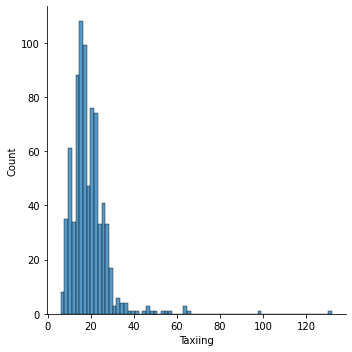

In [401]:
sns.displot(df_apt_time_merg[np.logical_and(df_apt_time_merg['Stand']=='stand_65', df_apt_time_merg['Runway']=='runway_3')]['Taxiing'])

In [402]:
df_apt_time_merg[np.logical_and(np.logical_and(df_apt_time_merg['Stand']=='stand_65', df_apt_time_merg['Runway']=='runway_3'), df_apt_time_merg['Taxiing']>100)]

,Flight Datetime,Aircraft Model,AOBT,ATOT,Stand,Runway,Hour,Day,Taxiing,Taxiing_date,N,Q,index,runway,Lat_runway,Lng_runway,stand,Lat_stand,Lng_stand,dist_m
220138,2016-04-09 08:00:00,A320-100/200,2016-04-09 08:16:00,2016-04-09 10:28:00,stand_65,runway_3,8,Saturday,132.0,0 days 02:12:00,10,10,1939,runway_3,54.761173,0.01984,stand_65,54.763716,0.026379,779.563553


In [414]:
df_w[df_w['Flight Datetime'] == '2018-08-10 12:10:00']

,Flight Number,Flight Datetime,Aircraft Model,Aircraft Length,Aircraft Span,No. Engines,Airport Arrival/Departure,Movement Type,AOBT,ATOT,Distance_proxy_m,Log_distance_m,actual_taxi_out_sec,Year,Month,Weekday,Hour,N_dep_dep,N_dep_arr,Q_dep_dep,Q_dep_arr,time_hourly,summary,icon,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,precipType,precipAccumulation,ozone,temp_int,N_Q_dep
490506,EZY8055,2018-08-10 12:10:00,A319,33.84,34.09,2,MPL,D,2018-08-10 15:13:00,2018-08-10 15:46:00,2566.430052,7.850271,1980,2018,8,4,12,10,6,5,8,2018-08-10 12:00:00,NaN,NaN,NaN,NaN,62.65,62.65,55.4,0.77,NaN,13.6,31.09,218.0,0.44,5.0,6.216,None,0.0,310.4,60,5
490507,EZY8421,2018-08-10 12:10:00,A320-100/200,37.56,34.09,2,LJU,D,2018-08-10 14:58:00,2018-08-10 15:20:00,2630.822107,7.875052,1320,2018,8,4,12,5,5,6,6,2018-08-10 12:00:00,NaN,NaN,NaN,NaN,62.65,62.65,55.4,0.77,NaN,13.6,31.09,218.0,0.44,5.0,6.216,None,0.0,310.4,60,-1
490508,BE804,2018-08-10 12:10:00,ERJ-195,38.65,28.71,2,NQY,D,2018-08-10 18:04:00,2018-08-10 18:37:00,3065.220029,8.027875,1980,2018,8,4,12,8,7,10,6,2018-08-10 12:00:00,NaN,NaN,NaN,NaN,62.65,62.65,55.4,0.77,NaN,13.6,31.09,218.0,0.44,5.0,6.216,None,0.0,310.4,60,-2
490509,FI471,2018-08-10 12:10:00,B757-200 WINGLETS,47.31,39.50,2,KEF,D,2018-08-10 13:09:00,2018-08-10 14:52:00,3068.090294,8.028811,6180,2018,8,4,12,2,8,6,1,2018-08-10 12:00:00,NaN,NaN,NaN,NaN,62.65,62.65,55.4,0.77,NaN,13.6,31.09,218.0,0.44,5.0,6.216,None,0.0,310.4,60,-4
490510,D82854,2018-08-10 12:10:00,B737-800 WINGLETS,39.50,35.70,2,ARN,D,2018-08-10 13:13:00,2018-08-10 15:15:00,3152.137005,8.055836,7320,2018,8,4,12,0,8,5,9,2018-08-10 12:00:00,NaN,NaN,NaN,NaN,62.65,62.65,55.4,0.77,NaN,13.6,31.09,218.0,0.44,5.0,6.216,None,0.0,310.4,60,-5


In [744]:
N_runway = []
Q_runway = []
N = []
Q = []

df_rw4 = df_apt_time[['AOBT', 'ATOT', 'Runway']].copy()
max_len = len(df_rw4)
for i, row in tqdm(df_rw4.iterrows()):
    #print(i, np.max((0, i-100)), np.min((max_len, i+100)))
    df_temp = df_rw4.iloc[np.max((0, i-400)):np.min((max_len, i+400)),:]
    test = np.logical_and((df_temp['AOBT'] < row['AOBT']) , (df_temp['ATOT'] > row['AOBT'])) 
    df_temp = df_temp[test]
    temp_n = np.sum(test)
    temp_q = np.sum(np.logical_and(test, df_temp['ATOT'] < row['ATOT'] ))
    temp_n_rw = np.sum(df_temp['Runway'] == row['Runway'])
    temp_q_rw = np.sum(np.logical_and(df_temp['Runway'] == row['Runway'], df_temp['ATOT'] < row['ATOT'] ))
    N.append(temp_n)
    Q.append(temp_q)
    N_runway.append(temp_n_rw)
    Q_runway.append(temp_q_rw)

    

543813it [17:41, 512.35it/s]


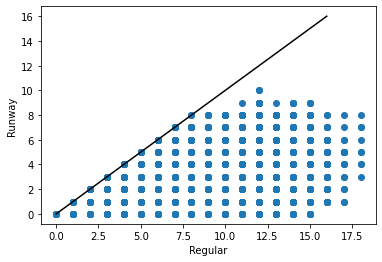

In [749]:
df_apt_time['N_rw'] = N_runway
df_apt_time['Q_rw'] = Q_runway
df_apt_time['N_new'] = N
df_apt_time['Q_new'] = Q

plt.scatter(x='Q', y='Q_rw', data =df_apt_time, label='Q')
plt.plot(np.arange(0,17,1), np.arange(0,17,1), color='black')
#plt.scatter(x='N', y='N_rw', data =df_apt_time, label='N', color='red')
plt.xlabel('Regular')
plt.ylabel('Runway')
plt.show()
df_apt_time[['Flight Datetime', 'ATOT', 'N', 'Q', 'N_rw','Q_rw' ]].to_pickle('./df_apt_time.pkl')

In [434]:
df_airlines = pd.read_html('https://en.wikipedia.org/wiki/List_of_airline_codes')[0]
df_airlines = df_airlines[~df_airlines.isnull()['Call sign']]

In [438]:
df_airlines[np.logical_or(df_airlines['IATA'] == 'EI', df_airlines['ICAO'] == 'EI')]

,IATA,ICAO,Airline,Call sign,Country/Region,Comments
67,EI,EIN,Aer Lingus,SHAMROCK,Ireland,NaN


In [439]:
df_w

,Flight Number,Flight Datetime,Aircraft Model,Aircraft Length,Aircraft Span,No. Engines,Airport Arrival/Departure,Movement Type,AOBT,ATOT,Distance_proxy_m,Log_distance_m,actual_taxi_out_sec,Year,Month,Weekday,Hour,N_dep_dep,N_dep_arr,Q_dep_dep,Q_dep_arr,time_hourly,summary,icon,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,precipType,precipAccumulation,ozone,temp_int,N_Q_dep
0,DY2434,2015-01-01 06:00:00,B737-800 WINGLETS,39.50,35.70,2,TFS,D,2015-01-01 05:56:00,2015-01-01 06:05:00,3276.655443,8.094578,540,2015,1,3,6,3,2,0,1,2015-01-01 06:00:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,44.65,39.29,42.80,0.93,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4,44,3
1,EZY8869,2015-01-01 06:10:00,A320-100/200,56.70,60.00,2,AMS,D,2015-01-01 06:08:00,2015-01-01 06:18:00,2777.685343,7.929373,600,2015,1,3,6,6,1,1,1,2015-01-01 06:00:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,44.65,39.29,42.80,0.93,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4,44,5
2,EZY8462,2015-01-01 06:15:00,A320-100/200,37.56,34.09,2,GVA,D,2015-01-01 06:08:00,2015-01-01 06:19:00,2729.133359,7.911739,660,2015,1,3,6,6,1,2,2,2015-01-01 06:00:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,44.65,39.29,42.80,0.93,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4,44,4
3,BA2632,2015-01-01 06:20:00,A320-100/200,37.56,34.09,2,ALC,D,2015-01-01 06:24:00,2015-01-01 06:36:00,2292.070065,7.737211,720,2015,1,3,6,9,2,5,1,2015-01-01 06:00:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,44.65,39.29,42.80,0.93,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4,44,4
4,EZY5381,2015-01-01 06:20:00,A319,33.84,34.09,2,MUC,D,2015-01-01 06:14:00,2015-01-01 06:27:00,3194.416489,8.069160,780,2015,1,3,6,6,1,2,2,2015-01-01 06:00:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,44.65,39.29,42.80,0.93,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4,44,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678897,EI249,2019-12-31 21:25:00,A320-100/200,37.56,34.09,2,DUB,D,2019-12-31 21:04:00,2019-12-31 21:17:00,503.565584,6.221714,780,2019,12,1,21,3,4,1,7,2019-12-31 21:00:00,Clear,clear-night,0.0,0.0,44.17,39.56,39.23,0.83,1031.8,8.25,20.27,102.0,0.26,0.0,6.391,None,0.0,313.3,44,2
678898,DI7505,2019-12-31 21:30:00,B787-900,0.00,0.00,2,EZE,D,2019-12-31 21:16:00,2019-12-31 21:34:00,616.921554,6.424742,1080,2019,12,1,21,1,6,3,5,2019-12-31 22:00:00,Clear,clear-night,0.0,0.0,42.40,37.00,40.55,0.93,1031.7,9.11,19.94,93.0,0.08,0.0,10.000,None,0.0,311.6,40,-2
678899,VY7829,2019-12-31 21:40:00,A320 NEO,56.70,60.00,2,BCN,D,2019-12-31 21:38:00,2019-12-31 21:56:00,383.514084,5.949376,1080,2019,12,1,21,1,7,1,7,2019-12-31 22:00:00,Clear,clear-night,0.0,0.0,42.40,37.00,40.55,0.93,1031.7,9.11,19.94,93.0,0.08,0.0,10.000,None,0.0,311.6,40,0
678900,W63032,2019-12-31 21:55:00,A321-100/200,44.50,34.09,2,OTP,D,2019-12-31 21:47:00,2019-12-31 22:01:00,565.777163,6.338200,840,2019,12,1,21,0,7,2,7,2019-12-31 22:00:00,Clear,clear-night,0.0,0.0,42.40,37.00,40.55,0.93,1031.7,9.11,19.94,93.0,0.08,0.0,10.000,None,0.0,311.6,40,-2


In [433]:
df_airlines[df_airlines.isnull()['Call sign']]

,IATA,ICAO,Airline,Call sign,Country/Region,Comments
2,1A,NaN,Amadeus IT Group S.A.,NaN,Global,GDS and airline hosting system (CRS/PSS)
3,1B,NaN,Sabre travel network Asia-Pacific (ex-Abacus),NaN,APAC,Regional distribution
4,1E,NaN,Travelsky,NaN,China,Local distribution system and hosting system (CRS/PSS)
5,1F,NaN,"Infini travel information, Inc.",NaN,Japan,Local distribution system (CRS)
6,1G,NaN,Travelport (Galileo core),NaN,Global,GDS (CRS)
...,...,...,...,...,...,...
6073,4Y,UYA,Yute Air Alaska,NaN,United States,NaN
6078,NaN,AZJ,Zas Air,NaN,Egypt,NaN
6088,NaN,KVZ,Z-Aero Airlines,NaN,Ukraine,NaN
6089,NaN,KZH,Zhez Air,NaN,Kazakhstan,NaN


In [518]:
i=0
flights = []
for flight in df_w['Flight Number'].unique():
    flights = np.append(flights,(np.array(re.compile('[0-9]').split(flight))))
    i+=1


In [519]:
flights

array(['DY', '', '', ..., '', '', ''], dtype='<U32')

In [510]:
np.array(flights).flatten()

<ipython-input-510-53548fa0cf4d>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array(flights).flatten()[0,0]


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

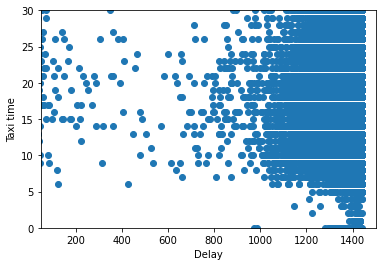

array([-9.76854506e-06,  1.55996840e-02,  1.69446980e+01])

In [541]:
plt.scatter(x = (df['Flight Datetime'] - df['AOBT'] ).dt.seconds/60, y = df['Taxiing'])
plt.xlabel('Delay')
plt.ylabel('Taxi time')
plt.ylim(0,30)
plt.xlim(50,1500)
plt.show()
np.polyfit((df['Flight Datetime'] - df['AOBT'] ).dt.seconds/60, df['Taxiing'], 2)

In [674]:
sns.displot(data = df[df['Aircraft Model'].isin(my_list)], x= 'Taxiing', hue='Aircraft Model')
plt.xlim(0,90)
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000002287E296820> (for post_execute):


KeyboardInterrupt: 

In [640]:
my_list = ((df.groupby('Aircraft Model').count() > 200000).all(axis=1)).index[(df.groupby('Aircraft Model').count() > 10).all(axis=1)]

In [641]:
len(my_list)

76

In [657]:
my_list = ((df.groupby('Aircraft Model').count() > 100) .any(axis=1).index[(df.groupby('Aircraft Model').count() > 100).all(axis=1).values])

In [650]:
(df.groupby('Aircraft Model').count() > 200000).all(axis=1).values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [691]:
df['Taxiing_pred_ma'] = df.set_index('Flight Datetime')['Taxiing'].rolling('60D', min_periods=1).mean().values

In [696]:
np.sqrt(np.sum((df['Taxiing'] - df['Taxiing_pred_ma'])**2))

6209.5353237437375

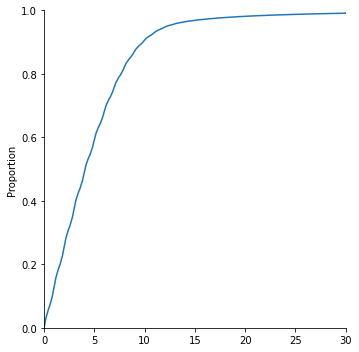

In [705]:
sns.displot(abs(df['Taxiing'] - df['Taxiing_pred_ma']), kind = 'ecdf')
plt.xlim(0,30)
plt.show()

In [761]:
df_w.set_index('Flight Datetime')['2018-12-31':'2018-12-31'].tail(20)

,Flight Number,Aircraft Model,Aircraft Length,Aircraft Span,No. Engines,Airport Arrival/Departure,Movement Type,AOBT,ATOT,Distance_proxy_m,Log_distance_m,actual_taxi_out_sec,Year,Month,Weekday,Hour,N_dep_dep,N_dep_arr,Q_dep_dep,Q_dep_arr,time_hourly,summary,icon,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,precipType,precipAccumulation,ozone
Flight Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-12-31 19:40:00,EZY8199,A319,33.84,34.09,2,MXP,D,2018-12-31 19:42:00,2018-12-31 19:52:00,2558.934460,7.847346,600,2018,12,0,19,6,7,1,1,2018-12-31 20:00:00,NaN,NaN,NaN,NaN,48.26,44.18,41.0,0.76,NaN,9.18,NaN,270.0,1.0,0.0,6.216,None,0.0,310.4
2018-12-31 19:45:00,EZY8217,A320-100/200,37.56,34.09,2,SXF,D,2018-12-31 19:47:00,2018-12-31 20:00:00,2503.921772,7.825613,780,2018,12,0,19,6,8,2,5,2018-12-31 20:00:00,NaN,NaN,NaN,NaN,48.26,44.18,41.0,0.76,NaN,9.18,NaN,270.0,1.0,0.0,6.216,None,0.0,310.4
2018-12-31 19:50:00,EZY8581,A320-100/200,37.56,34.09,2,BCN,D,2018-12-31 19:45:00,2018-12-31 19:56:00,2465.098127,7.809987,660,2018,12,0,19,6,9,2,5,2018-12-31 20:00:00,NaN,NaN,NaN,NaN,48.26,44.18,41.0,0.76,NaN,9.18,NaN,270.0,1.0,0.0,6.216,None,0.0,310.4
2018-12-31 19:50:00,EZY8419,A319,33.84,34.09,2,LYS,D,2018-12-31 19:50:00,2018-12-31 20:03:00,2516.748360,7.830723,780,2018,12,0,19,6,7,3,7,2018-12-31 20:00:00,NaN,NaN,NaN,NaN,48.26,44.18,41.0,0.76,NaN,9.18,NaN,270.0,1.0,0.0,6.216,None,0.0,310.4
2018-12-31 19:55:00,EZS8482,A320-100/200,56.70,60.00,2,GVA,D,2018-12-31 20:04:00,2018-12-31 20:15:00,2624.219479,7.872539,660,2018,12,0,19,1,4,6,6,2018-12-31 20:00:00,NaN,NaN,NaN,NaN,48.26,44.18,41.0,0.76,NaN,9.18,NaN,270.0,1.0,0.0,6.216,None,0.0,310.4
2018-12-31 20:00:00,BA2041,B777-200,63.72,60.90,2,CPT,D,2018-12-31 19:52:00,2018-12-31 20:10:00,3253.257201,8.087412,1080,2018,12,0,20,4,6,6,8,2018-12-31 20:00:00,NaN,NaN,NaN,NaN,48.26,44.18,41.0,0.76,NaN,9.18,NaN,270.0,1.0,0.0,6.216,None,0.0,310.4
2018-12-31 20:05:00,EZY8883,A319,33.84,34.09,2,AMS,D,2018-12-31 19:55:00,2018-12-31 20:08:00,2461.511812,7.808531,780,2018,12,0,20,3,6,5,7,2018-12-31 20:00:00,NaN,NaN,NaN,NaN,48.26,44.18,41.0,0.76,NaN,9.18,NaN,270.0,1.0,0.0,6.216,None,0.0,310.4
2018-12-31 20:15:00,D86055,B737-800 WINGLETS,39.50,35.70,2,MAD,D,2018-12-31 20:06:00,2018-12-31 20:16:00,2890.309340,7.969119,600,2018,12,0,20,0,5,7,6,2018-12-31 20:00:00,NaN,NaN,NaN,NaN,48.26,44.18,41.0,0.76,NaN,9.18,NaN,270.0,1.0,0.0,6.216,None,0.0,310.4
2018-12-31 20:20:00,I23717,A320-100/200,37.56,34.09,2,MAD,D,2018-12-31 20:26:00,2018-12-31 20:33:00,2765.169044,7.924857,420,2018,12,0,20,5,8,2,5,2018-12-31 20:00:00,NaN,NaN,NaN,NaN,48.26,44.18,41.0,0.76,NaN,9.18,NaN,270.0,1.0,0.0,6.216,None,0.0,310.4


In [757]:
my_df = pd.read_pickle('./df_apt_time.pkl')

In [759]:
my_df.tail(10)

,Flight Datetime,ATOT,N,Q,N_rw,Q_rw
543803,2018-12-31 20:30:00,2018-12-31 20:40:00,1,1,0,0
543804,2018-12-31 20:35:00,2018-12-31 20:52:00,3,3,1,1
543805,2018-12-31 20:45:00,2018-12-31 20:45:00,4,2,2,1
543806,2018-12-31 20:45:00,2018-12-31 20:43:00,2,1,0,0
543807,2018-12-31 21:15:00,2018-12-31 21:09:00,0,0,0,0
543808,2018-12-31 21:15:00,2018-12-31 21:20:00,1,1,0,0
543809,2018-12-31 21:30:00,2018-12-31 21:38:00,0,0,0,0
543810,2018-12-31 21:50:00,2018-12-31 22:37:00,1,1,0,0
543811,2018-12-31 22:10:00,2018-12-31 22:29:00,0,0,0,0
543812,2018-12-31 23:55:00,2019-01-01 00:11:00,0,0,0,0
